In [3]:
#importing the necessary libraries 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
data = pd.read_csv("D:\\DATA SCIENCE\\DATA ANALYTICS\\Admission_Prediction MLR.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
#university rating, GRE score, TOFEL score has some missing values 

In [7]:
data["University Rating"].unique() #checking for the unique values in the University rating to fill the misssing values

array([ 4.,  3.,  2.,  5., nan,  1.])

In [137]:
data["University Rating"].mode()

0    3.0
Name: University Rating, dtype: float64

In [131]:
data["University Rating"].mode()[0]

3.0

In [10]:
data["University Rating"] = data["University Rating"].fillna(data["University Rating"].mode()[0])

In [139]:
data["TOEFL Score"].mean()

107.18775510204081

In [141]:
data["GRE Score"].mean()

316.5587628865979

In [143]:
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [13]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and there are no missing values. Also, the first cloumn is just serial numbers, so we don't need that column. Let's drop it from data and make it more clean.

In [15]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Let's visualize the data and analyze the relationship between independent and dependent variables:

C:\Users\91846\AppData\Local\Temp\ipykernel_13380\4074166583.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\91846\AppData\Local\Temp\ipykernel_13380\4074166583.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\91846\AppData\Local\Temp\ipykerne

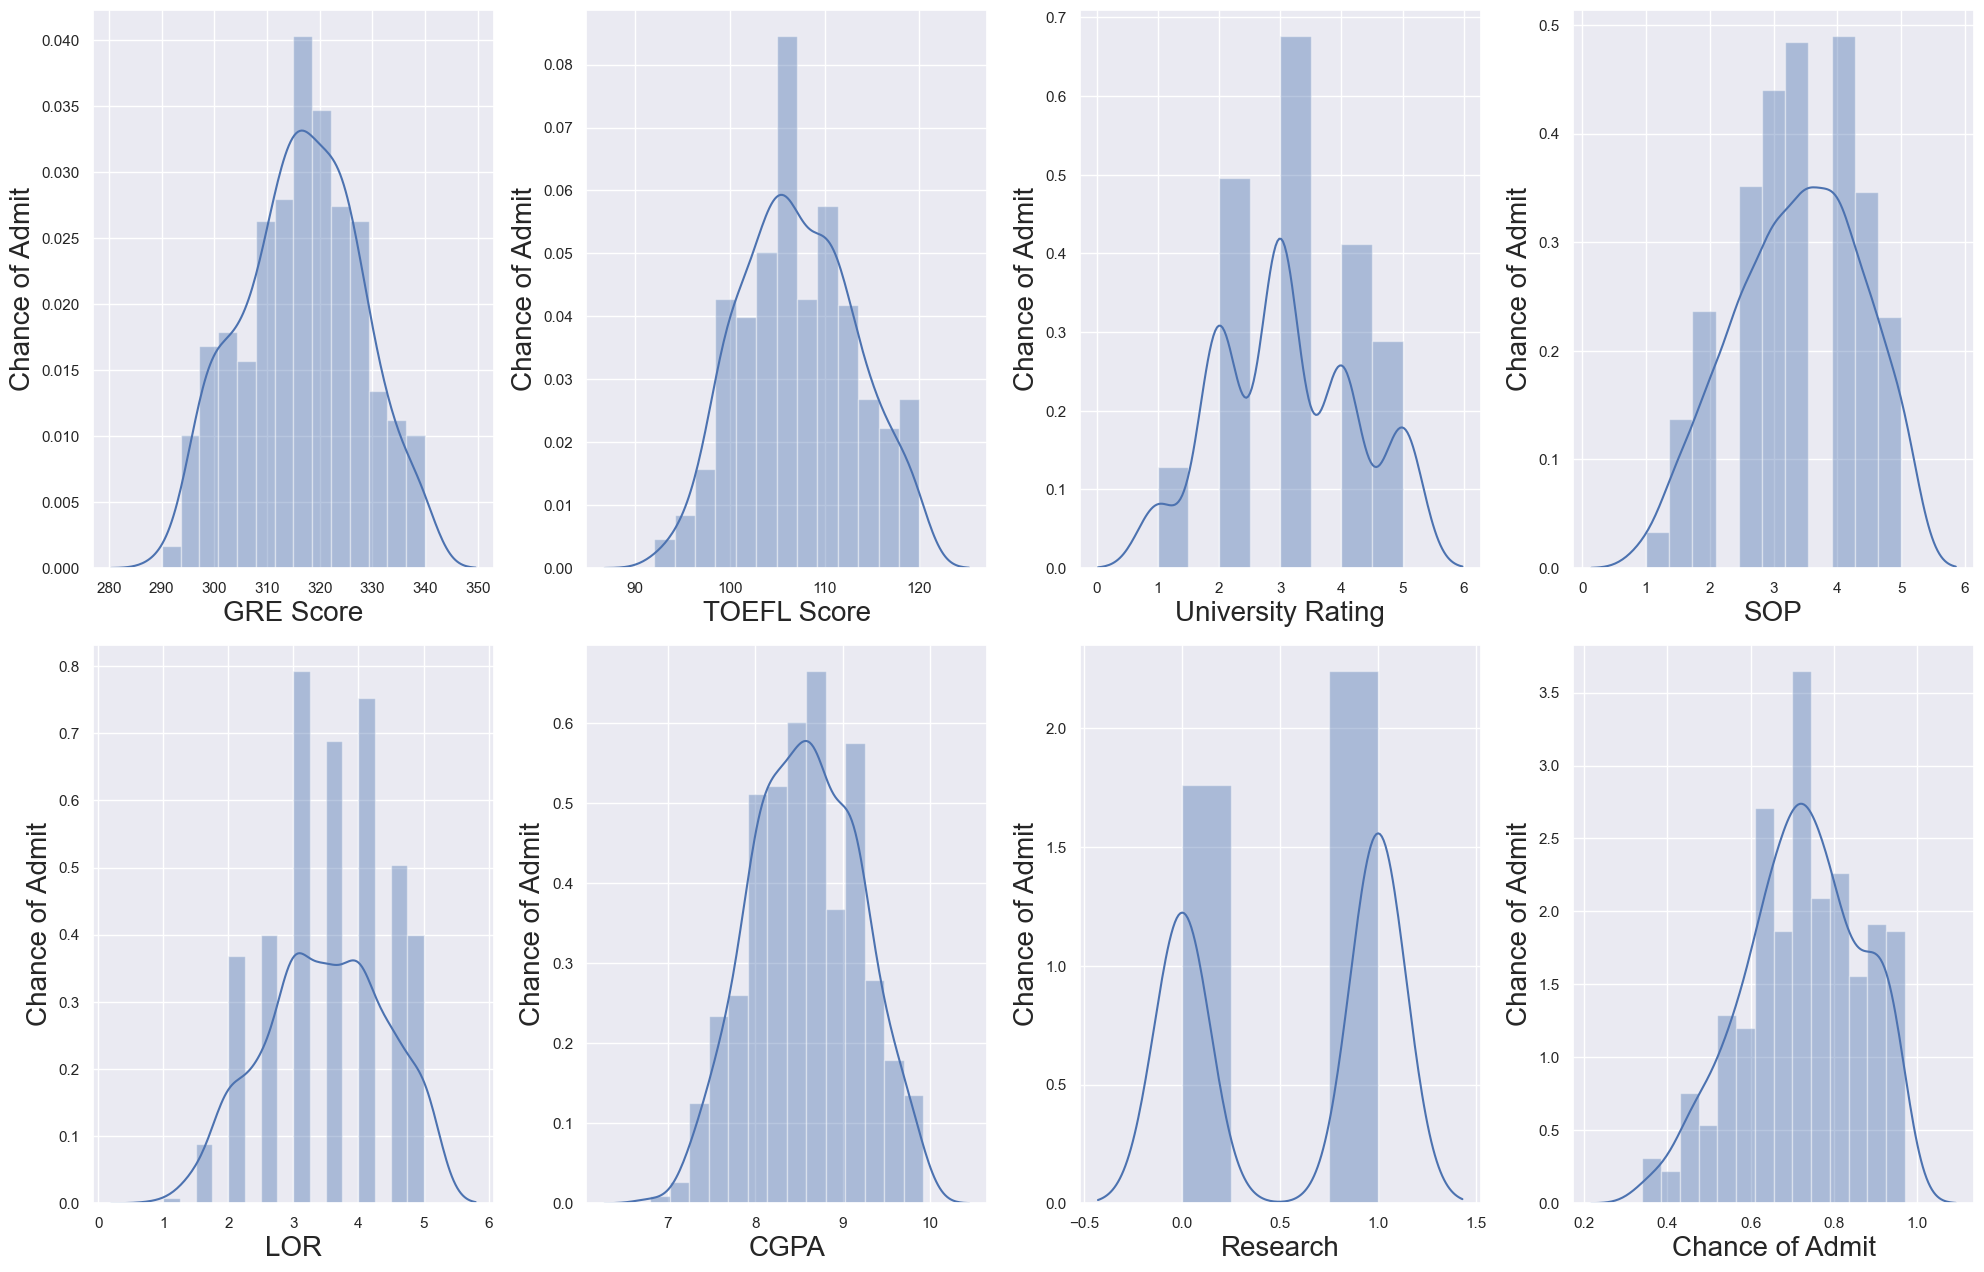

In [146]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.

In [1]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])
X.head()

NameError: name 'data' is not defined

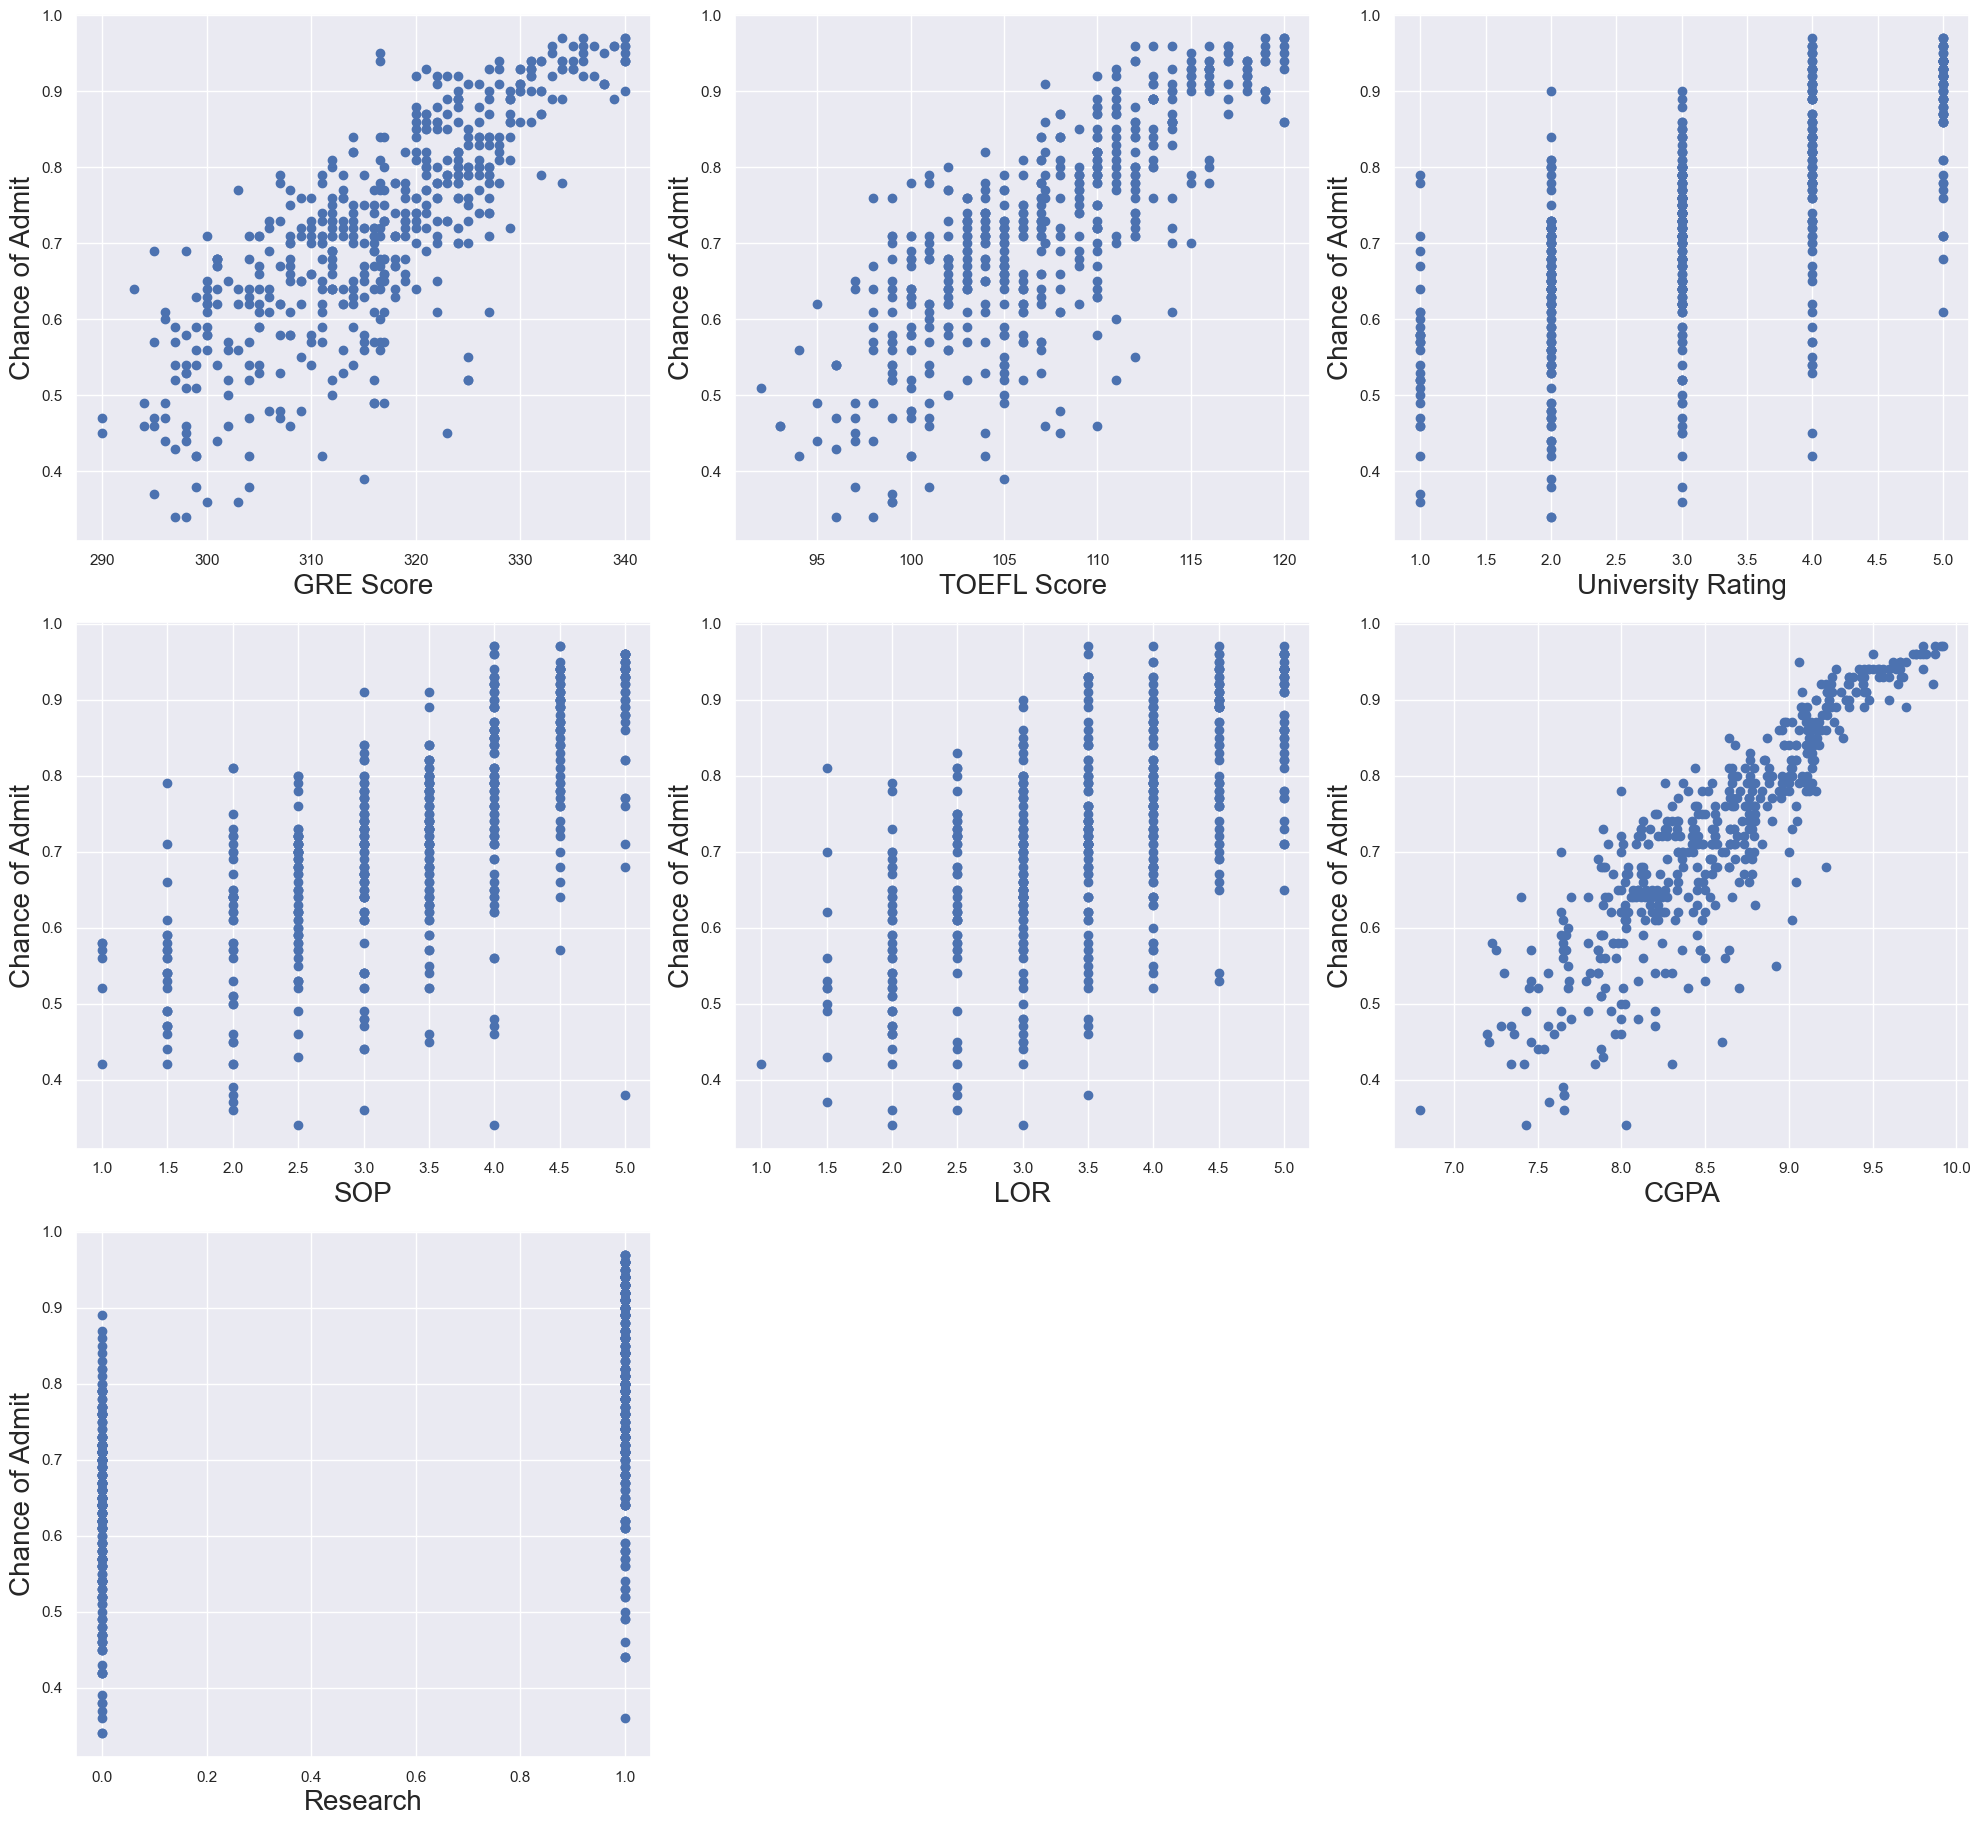

In [20]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.

In [156]:
X.iloc[0]

GRE Score            337.00
TOEFL Score          118.00
University Rating      4.00
SOP                    4.50
LOR                    4.50
CGPA                   9.65
Research               1.00
Name: 0, dtype: float64

using the StandardScaler on your data, it transforms the numbers in a way that makes them more comparable and helps algorithms work better with the standardized data.
standardizing features by removing the mean and scaling to unit variance. 

In [24]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([1.84274116, 1.78854223, 0.78200955, 1.13735981, 1.09894429,
       1.77680627, 0.88640526])

VIF is used to find the multicolinearity between the features 
it creates a linear regression model in between all the features in the input and looks for the features having any relation between the input features

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [27]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't have any VIF greater than 5 , so we are good to go. 


In [174]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [176]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [31]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [32]:
import pickle

In [33]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [34]:
# prediction using the saved model
import pickle
from sklearn.preprocessing import StandardScaler

# Assuming 'scaler' is already defined and initialized
# scaler = StandardScaler()

try:
    with open(filename, 'rb') as file:
        loaded_model = pickle.load(file)
        prediction_input = scaler.transform([[300, 110, 5, 5, 5, 10, 1]])
        prediction_output = loaded_model.predict(prediction_input)
        print("Prediction:", prediction_output)
except OSError as e:
    print('An error occurred while loading the model:', e)

Prediction: [0.92190162]


C:\Users\91846\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
regression.score(x_train,y_train)

0.8415250484247909

In [36]:
#Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [37]:
adj_r2(x_train,y_train)

0.8385023654247188

Our r2 score is 84.15% and adj r2 is 83.85% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [39]:
regression.score(x_test,y_test)

0.7534898831471064

In [40]:
adj_r2(x_test,y_test)

0.738741414617446

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [42]:
from sklearn.linear_model import LassoCV

# Lasso Regularization
# LassoCV will return the best alpha and coefficients after performing 10 cross-validations
lasscv = LassoCV(alphas=None, cv=10, max_iter=100000)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [43]:
alpha = lasscv.alpha_
alpha

0.0005934853486378091

In [44]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0005934853486378091)

In [45]:
lasso_reg.score(x_test, y_test)

0.7530347684111502

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [47]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([1.05270388, 6.04649558, 1.9840892 , 9.92270595, 9.22939638,
       7.70944656, 0.59669714, 6.37531052, 8.86927445, 2.56564842,
       2.03138803, 2.61601629, 7.88252241, 8.62216972, 4.13813314,
       3.10689081, 6.69753151, 4.57320189, 5.09885095, 6.30148432,
       2.99168036, 4.19855629, 8.53741715, 0.75606108, 7.91131695,
       8.85779091, 5.4064603 , 8.25462318, 7.84753605, 9.71257499,
       6.20195566, 2.47864138, 6.11342131, 8.8844264 , 0.36347106,
       4.11851459, 2.23145383, 9.54578127, 6.6446944 , 7.65985282,
       3.90131306, 5.87479599, 0.81681232, 0.09096162, 9.87885015,
       3.78089854, 7.33680925, 3.86631203, 6.80811084, 9.99678927]),
        cv=10)

In [48]:
ridgecv.alpha_

9.996789265142189

In [49]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=9.996789265142189)

In [50]:
ridge_model.score(x_test, y_test)

0.757180733786883

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [52]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [53]:
elasticCV.alpha_

0.0011069728449315508

In [54]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [55]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [56]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639868

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

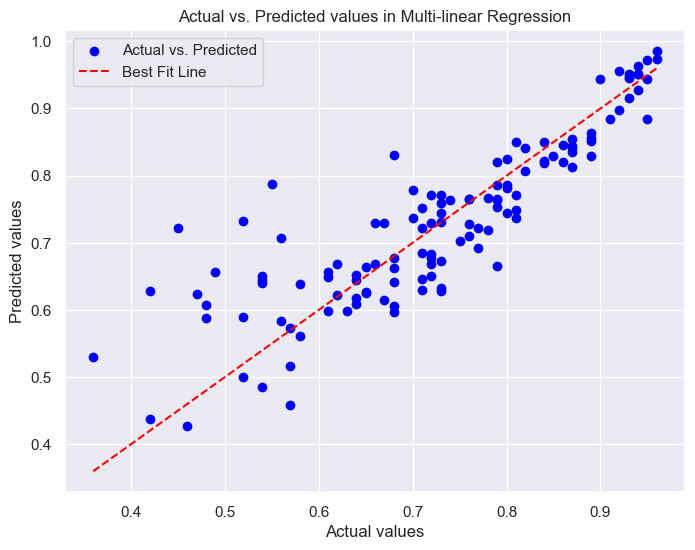

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming model is your trained multi-linear regression model
# Assuming x_test and y_test are your test data

# Make predictions using the multi-linear regression model
y_pred = regression.predict(x_test)

# Plot the best fit line graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Best Fit Line')
plt.title('Actual vs. Predicted values in Multi-linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()